WIKI: https://en.wikipedia.org/wiki/Kernel_density_estimation
KDE: http://rightthewaygeek.blogspot.tw/2015/09/kernel-density-estimation.html

KDE也是類似的概念，要回答的問題是，當某個xx並未被觀察到的時候，究竟背後的機率是多少？KDE回答問題的方式，就是去看xx相進的點出現的情形，如果出現的多，表示其實xx出現的機率很高，只是剛好by chance沒有被觀察到而已，反之則xx本身出現的機率就是低的

h的選擇很重要，太大的帶寬會導致under-fitting，太小的則導致over-fitting。帶寬的選擇又是另外一個很大的題目了

In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [19]:
dataset = randn(25)

### Rug Plot
軸須圖: 每根須都對應著一個data，data密集的地方看起來就比較粗，一般和其他一些統計圖形結合著用，可以更好幫助瞭解原始data的資訊

(0, 1)

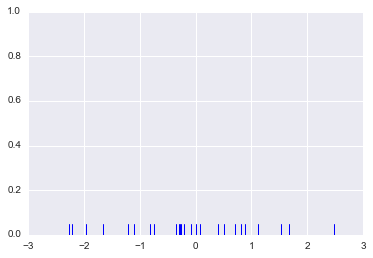

In [24]:
sns.rugplot(dataset)
plt.ylim(0, 1) # 將y軸的range設在0-1

(array([ 3.,  1.,  2.,  2.,  8.,  2.,  3.,  2.,  1.,  1.]),
 array([-2.26998963, -1.79524445, -1.32049927, -0.84575409, -0.3710089 ,
         0.10373628,  0.57848146,  1.05322664,  1.52797183,  2.00271701,
         2.47746219]),
 <a list of 10 Patch objects>)

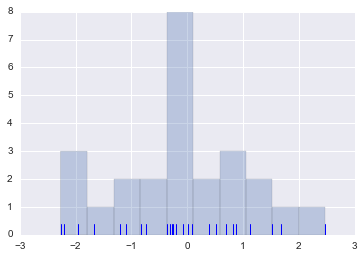

In [27]:
# 結合rugplot + histogram
sns.rugplot(dataset)
plt.hist(dataset, alpha=0.3)

(0, 1)

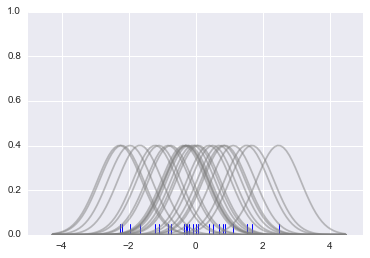

In [66]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 將min和max的range切分成100等分
x_axis = np.linspace(x_min, x_max, 100)

# Practical estimation of the bandwidth (from wiki)
bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

# 這邊簡單來說，就是對每個data point畫normal distribution上去 (data point為mean，bandwidth為SD)
for data_point in dataset:
    # Create a kernel for each point and append it to the kernel_list
    # stats.norm(loc, scale).pdf(x)，loc為mean，scale為SD，算出在此分布中，x點的機率(若x為多點的array，回傳多點機率的array)
    # stats.norm(loc, scale).pdf(x)等同於stats.norm.pdf(x, loc, scale)
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max() # 將機率限縮在1以內
    kernel = kernel * 0.4 # 再將機率限縮在0.4以內
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)

plt.ylim(0, 1)

### 為什麼要對每個點畫常態分布的機率?
因為依照KDE的精神，我們假定越靠近data point發生的點，再發生的機率越高

而這邊我們的做法叫做**"gaussian kernel"**

不同的kernel: https://en.wikipedia.org/wiki/Kernel_(statistics)

In [67]:
# 最後把所有點的機率加起來
sum_of_kde = np.sum(kernel_list, axis=0)
"""
Example:
a = np.array([1, 2])
b = np.array([3, 4])
np.sum([a, b], axis=0)

Output: array([4, 6])
"""

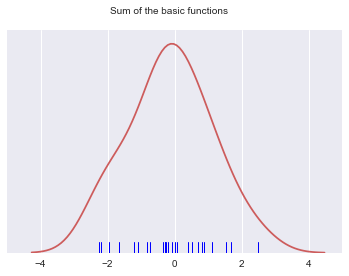

In [83]:
plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)
plt.yticks([]) # 不設y軸label
plt.suptitle("Sum of the basic functions")

## 以上我們可以直接使用`seaborn.kdeplot`來做到

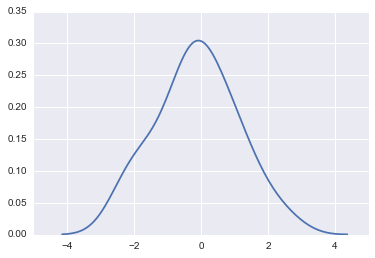

In [84]:
sns.kdeplot(dataset)

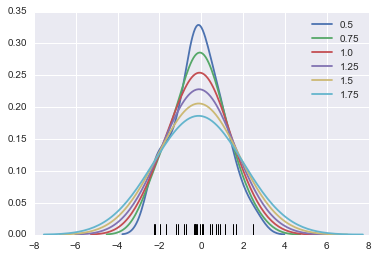

In [95]:
sns.rugplot(dataset, color='black')

# 看看不使用預設bandwidth算法的情況下，各個bandwidth畫出來的分布
for bandwidth in np.arange(0.5, 2, 0.25): # 0.5, 0.75, ..., 1.5, 1.75
    sns.kdeplot(dataset, bw=bandwidth, lw=1.8, label=bandwidth) # lw是LineWidth的意思，線條粗度

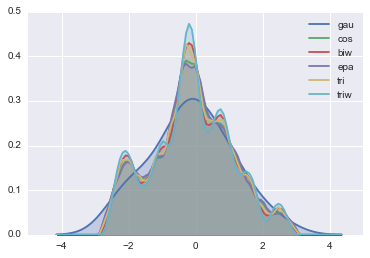

In [99]:
kernel_options = ['gau', 'cos', 'biw', 'epa', 'tri','triw']

# 看看不使用預設kernel function的情況下，各個kernel畫出來的分布
for kernel in kernel_options:
    sns.kdeplot(dataset, kernel=kernel, lw=1.8, label=kernel)

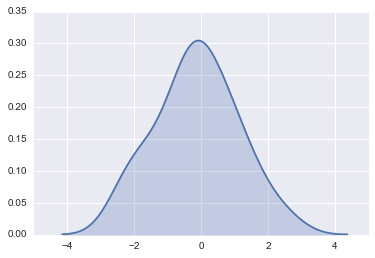

In [100]:
# Shade
sns.kdeplot(dataset, shade=True)

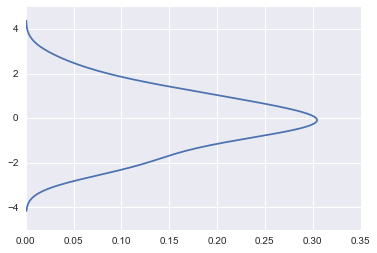

In [101]:
# Vertical
sns.kdeplot(dataset, vertical=True)

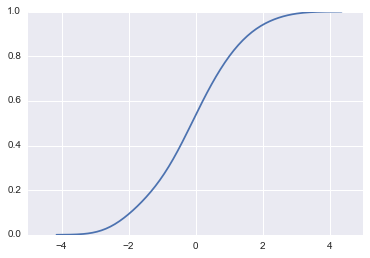

In [102]:
# Cumulative Distribution Function (CDF)
sns.kdeplot(dataset, cumulative=True)

# Multivariate Density Estimation using kdeplot

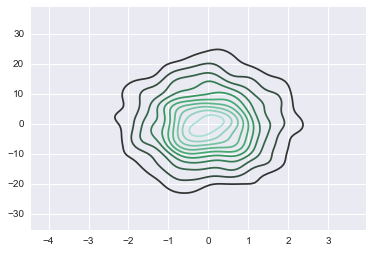

In [115]:
mean = [0, 0]

cov = [[1, 0], [0, 100]] # Covariance matrix目前我還不了解

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])

sns.kdeplot(dframe) # 等同sns.kdeplot(dframe.X, dframe.Y)

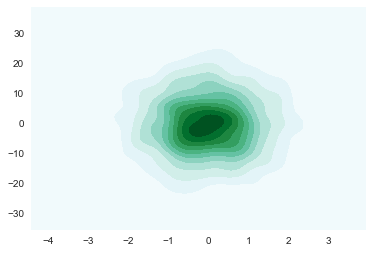

In [118]:
sns.kdeplot(dframe, shade=True)

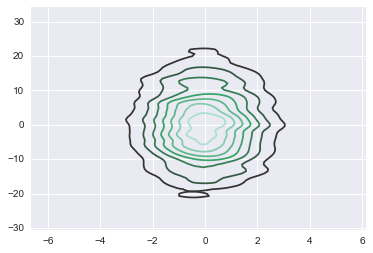

In [119]:
sns.kdeplot(dframe, bw=1)

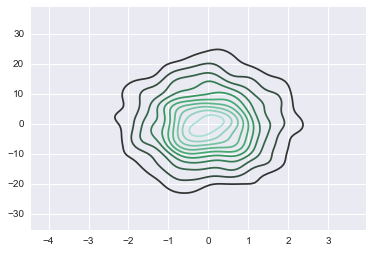

In [124]:
# bw : {'scott' | 'silverman'}
sns.kdeplot(dframe, bw='scott')

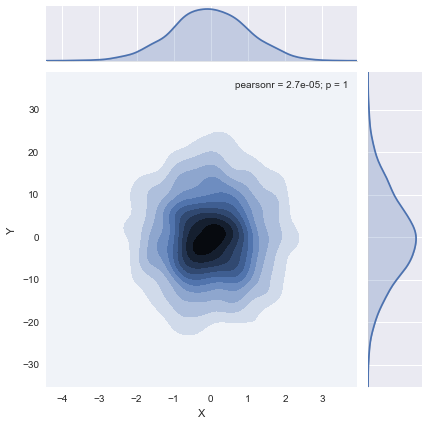

In [125]:
sns.jointplot('X', 'Y', dframe, kind='kde')